In [1]:
from sbalign.training.diffusivity import *
from torch.distributions.multivariate_normal import MultivariateNormal
import matplotlib.pyplot as plt

cov tensor([[[1.0009e+00, 9.4134e-04, 9.3200e-04],
         [9.4134e-04, 1.0556e-03, 9.4589e-04],
         [9.3200e-04, 9.4589e-04, 1.0366e-03]]])
cov tensor([[[1.0018, 0.0018, 0.0018],
         [0.0018, 0.0019, 0.0018],
         [0.0018, 0.0018, 0.0019]]])
cov tensor([[[1.0025, 0.0026, 0.0025],
         [0.0026, 0.0027, 0.0025],
         [0.0025, 0.0025, 0.0026]]])
cov tensor([[[1.0032, 0.0033, 0.0032],
         [0.0033, 0.0034, 0.0032],
         [0.0032, 0.0032, 0.0032]]])
cov tensor([[[1.0038, 0.0039, 0.0037],
         [0.0039, 0.0041, 0.0038],
         [0.0037, 0.0038, 0.0037]]])
cov tensor([[[1.0044, 0.0045, 0.0042],
         [0.0045, 0.0047, 0.0043],
         [0.0042, 0.0043, 0.0042]]])
cov tensor([[[1.0049, 0.0050, 0.0047],
         [0.0050, 0.0052, 0.0047],
         [0.0047, 0.0047, 0.0045]]])
cov tensor([[[1.0054, 0.0055, 0.0050],
         [0.0055, 0.0057, 0.0051],
         [0.0050, 0.0051, 0.0049]]])
cov tensor([[[1.0058, 0.0059, 0.0054],
         [0.0059, 0.0061, 0.0055],
  

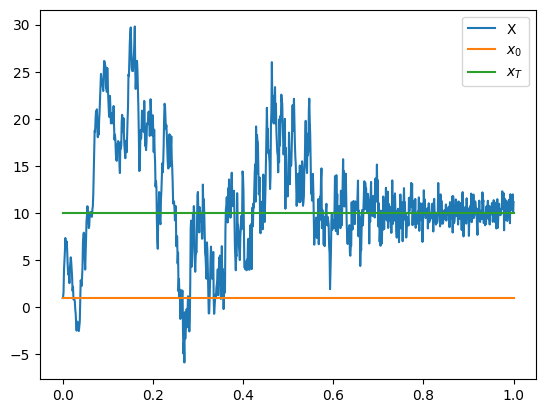

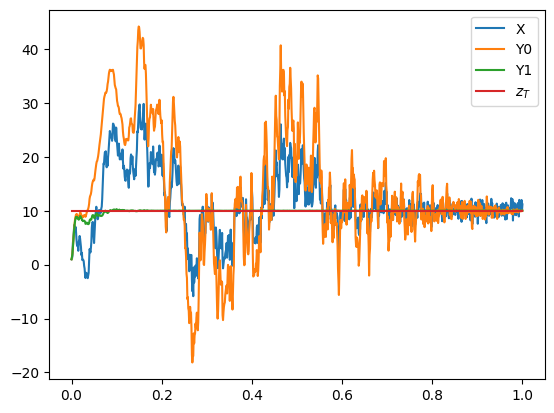

In [ ]:
a = 1.0 #start value z_0 of process
b = 10.0 #end value z_T of process

# so far it only works for K<=2, where for K=2 it only works for H=>0.5 - other K and H result in non positiv definit covariance matrix
# todo: check all formulars again

H=0.5
K=2

fbb = FBB(H=H, K=K)

N = 1000
T = 1.0
dt = T/N 

time = torch.linspace(0,1,N+1)
Z = torch.ones(N+1,K+1) * a
zT = torch.ones(K+1)*b

for i in range(N):
    z = Z[i]
    t = time[i+1]
    mean,cov = fbb.pinned_statistics(torch.tensor([t]),z,zT)
    mvn = MultivariateNormal(mean,cov)
    sample = mvn.sample(sample_shape=(1,))
    Z[i+1] = sample

plt.plot(time,Z[:,0],label='X')
plt.plot(time,(torch.ones_like(Z)*a)[:,0],label=r'$x_0$')
plt.plot(time,(torch.ones_like(Z)*b)[:,0],label=r'$x_T$')
plt.legend()
plt.show()
plt.close()

plt.plot(time,Z[:,0],label='X')
for k in range(K):
    plt.plot(time,Z[:,k+1], label=f'Y{k}')
plt.plot(time,(torch.ones_like(Z)*b)[:,0],label=r'$z_T$')
plt.legend()
plt.show()
plt.close()